## Writing like Shakespeare (Shakespeare poem generator with Keras)

A similar task to character-level text generation (but more complicated) is generating Shakespearean poems. Instead of learning from a dataset of dinosaur names, you can use a collection of Shakespearean poems. Using LSTM cells, you can learn longer-term dependencies that span many characters in the text--e.g., where a character appearing somewhere a sequence can influence what should be a different character, much later in the sequence. These long-term dependencies were less important with dinosaur names, since the names were quite short.

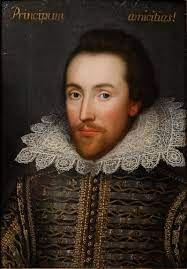




In [25]:
# Load Packages
from __future__ import print_function
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import random
import sys
import io

def build_data(text, Tx = 40, stride = 3):
    """
    Create a training set by scanning a window of size Tx over the text corpus, with stride 3.

    Arguments:
    text -- string, corpus of Shakespearian poem
    Tx -- sequence length, number of time-steps (or characters) in one training example
    stride -- how much the window shifts itself while scanning

    Returns:
    X -- list of training examples
    Y -- list of training labels
    """

    X = []
    Y = []

    for i in range(0, len(text) - Tx, stride):
        X.append(text[i: i + Tx])
        Y.append(text[i + Tx])
   
    print('number of training examples:', len(X))

    return X, Y


def vectorization(X, Y, n_x, char_indices, Tx = 40):
    """
    Convert X and Y (lists) into arrays to be given to a recurrent neural network.

    Arguments:
    X --
    Y --
    Tx -- integer, sequence length

    Returns:
    x -- array of shape (m, Tx, len(chars))
    y -- array of shape (m, len(chars))
    """

    m = len(X)
    x = np.zeros((m, Tx, n_x), dtype=np.bool)
    y = np.zeros((m, n_x), dtype=np.bool)
    for i, sentence in enumerate(X):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[Y[i]]] = 1

    return x, y


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    out = np.random.choice(range(len(chars)), p = probas.ravel())
    return out
    #return np.argmax(probas)

def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    None
    #start_index = random.randint(0, len(text) - Tx - 1)

    #generated = ''
    #sentence = text[start_index: start_index + Tx]
    #sentence = '0'*Tx
    #usr_input = input("Write the beginning of your poem, the Shakespearian machine will complete it.")
    # zero pad the sentence to Tx characters.
    #sentence = ('{0:0>' + str(Tx) + '}').format(usr_input).lower()
    #generated += sentence
#
    #sys.stdout.write(usr_input)

    #for i in range(400):
"""
        #x_pred = np.zeros((1, Tx, len(chars)))

        for t, char in enumerate(sentence):
            if char != '0':
                x_pred[0, t, char_indices[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature = 1.0)
        next_char = indices_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()

        if next_char == '\n':
            continue

    # Stop at the end of a line (4 lines)
    print()
 """
print("Loading text data...")
text = io.open('/content/shakespeare.txt', encoding='utf-8').read().lower()
#print('corpus length:', len(text))

Tx = 40
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
#print('number of unique characters in the corpus:', len(chars))

print("Creating training set...")
X, Y = build_data(text, Tx, stride = 3)
print("Vectorizing training set...")
x, y = vectorization(X, Y, n_x = len(chars), char_indices = char_indices)
print("Loading model...")
model = load_model('/content/model_shakespeare_kiank_350_epoch.h5')

def generate_output():
    generated = ''
    #sentence = text[start_index: start_index + Tx]
    #sentence = '0'*Tx
    usr_input = input("Write the beginning of your poem, the Shakespeare machine will complete it. Your input is: ")
    # zero pad the sentence to Tx characters.
    sentence = ('{0:0>' + str(Tx) + '}').format(usr_input).lower()
    generated += usr_input

    sys.stdout.write("\n\nHere is your poem: \n\n")
    sys.stdout.write(usr_input)
    for i in range(400):

        x_pred = np.zeros((1, Tx, len(chars)))

        for t, char in enumerate(sentence):
            if char != '0':
                x_pred[0, t, char_indices[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature = 1.0)
        next_char = indices_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()

        if next_char == '\n':
            continue

Loading text data...
Creating training set...
number of training examples: 31412
Vectorizing training set...


<ipython-input-25-e0d00c13fa55>:57: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros((m, Tx, n_x), dtype=np.bool)
<ipython-input-25-e0d00c13fa55>:58: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((m, n_x), dtype=np.bool)


Loading model...


To save you some time, a model has already been trained for ~1000 epochs on a collection of Shakespearean poems called "<i>[The Sonnets](shakespeare.txt)</i>."

Let's train the model for one more epoch. When it finishes training for an epoch (this will also take a few minutes), you can run `generate_output`, which will prompt you for an input (`<`40 characters). The poem will start with your sentence, and your RNN Shakespeare will complete the rest of the poem for you! For example, try, "Forsooth this maketh no sense" (without the quotation marks!). Depending on whether you include the space at the end, your results might also differ, so try it both ways, and try other inputs as well.

In [28]:
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y, batch_size=128, epochs=1, callbacks=[print_callback])

246/246 [==============================] - 124s 489ms/step - loss: 2.5500


In [33]:
# Run this cell to try with different inputs without having to re-train the model
generate_output()

Write the beginning of your poem, the Shakespeare machine will complete it. Your input is: In 


Here is your poem: 

In eyes.
 be 'tives betort, sealinc praysed to thee,
and you cheast ver the age pren salver ard,
leds my concander, thit plipficcet os trise,
and now leyd wend's flome mounder barpes,
that frield, ner mo marred that relend earst?
dederion restfich wos crasy to say,
the or'en lebded dighs of (raires now.
 deblok with thee wate all his mush then bi limed,
me for whise co opneal thue pured wiere.
'wort 

The RNN Shakespeare model is very similar to the one you built for dinosaur names. The only major differences are:
- LSTMs instead of the basic RNN to capture longer-range dependencies
- The model is a deeper, stacked LSTM model (2 layer)
- Using Keras instead of Python to simplify the code
